In [6]:
import pandas as pd
path = r"C:\Users\chinky\Desktop\heart_disease_pred\heartdiseasepred.csv"

df = pd.read_csv(path)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [9]:
df.shape

(303, 14)

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

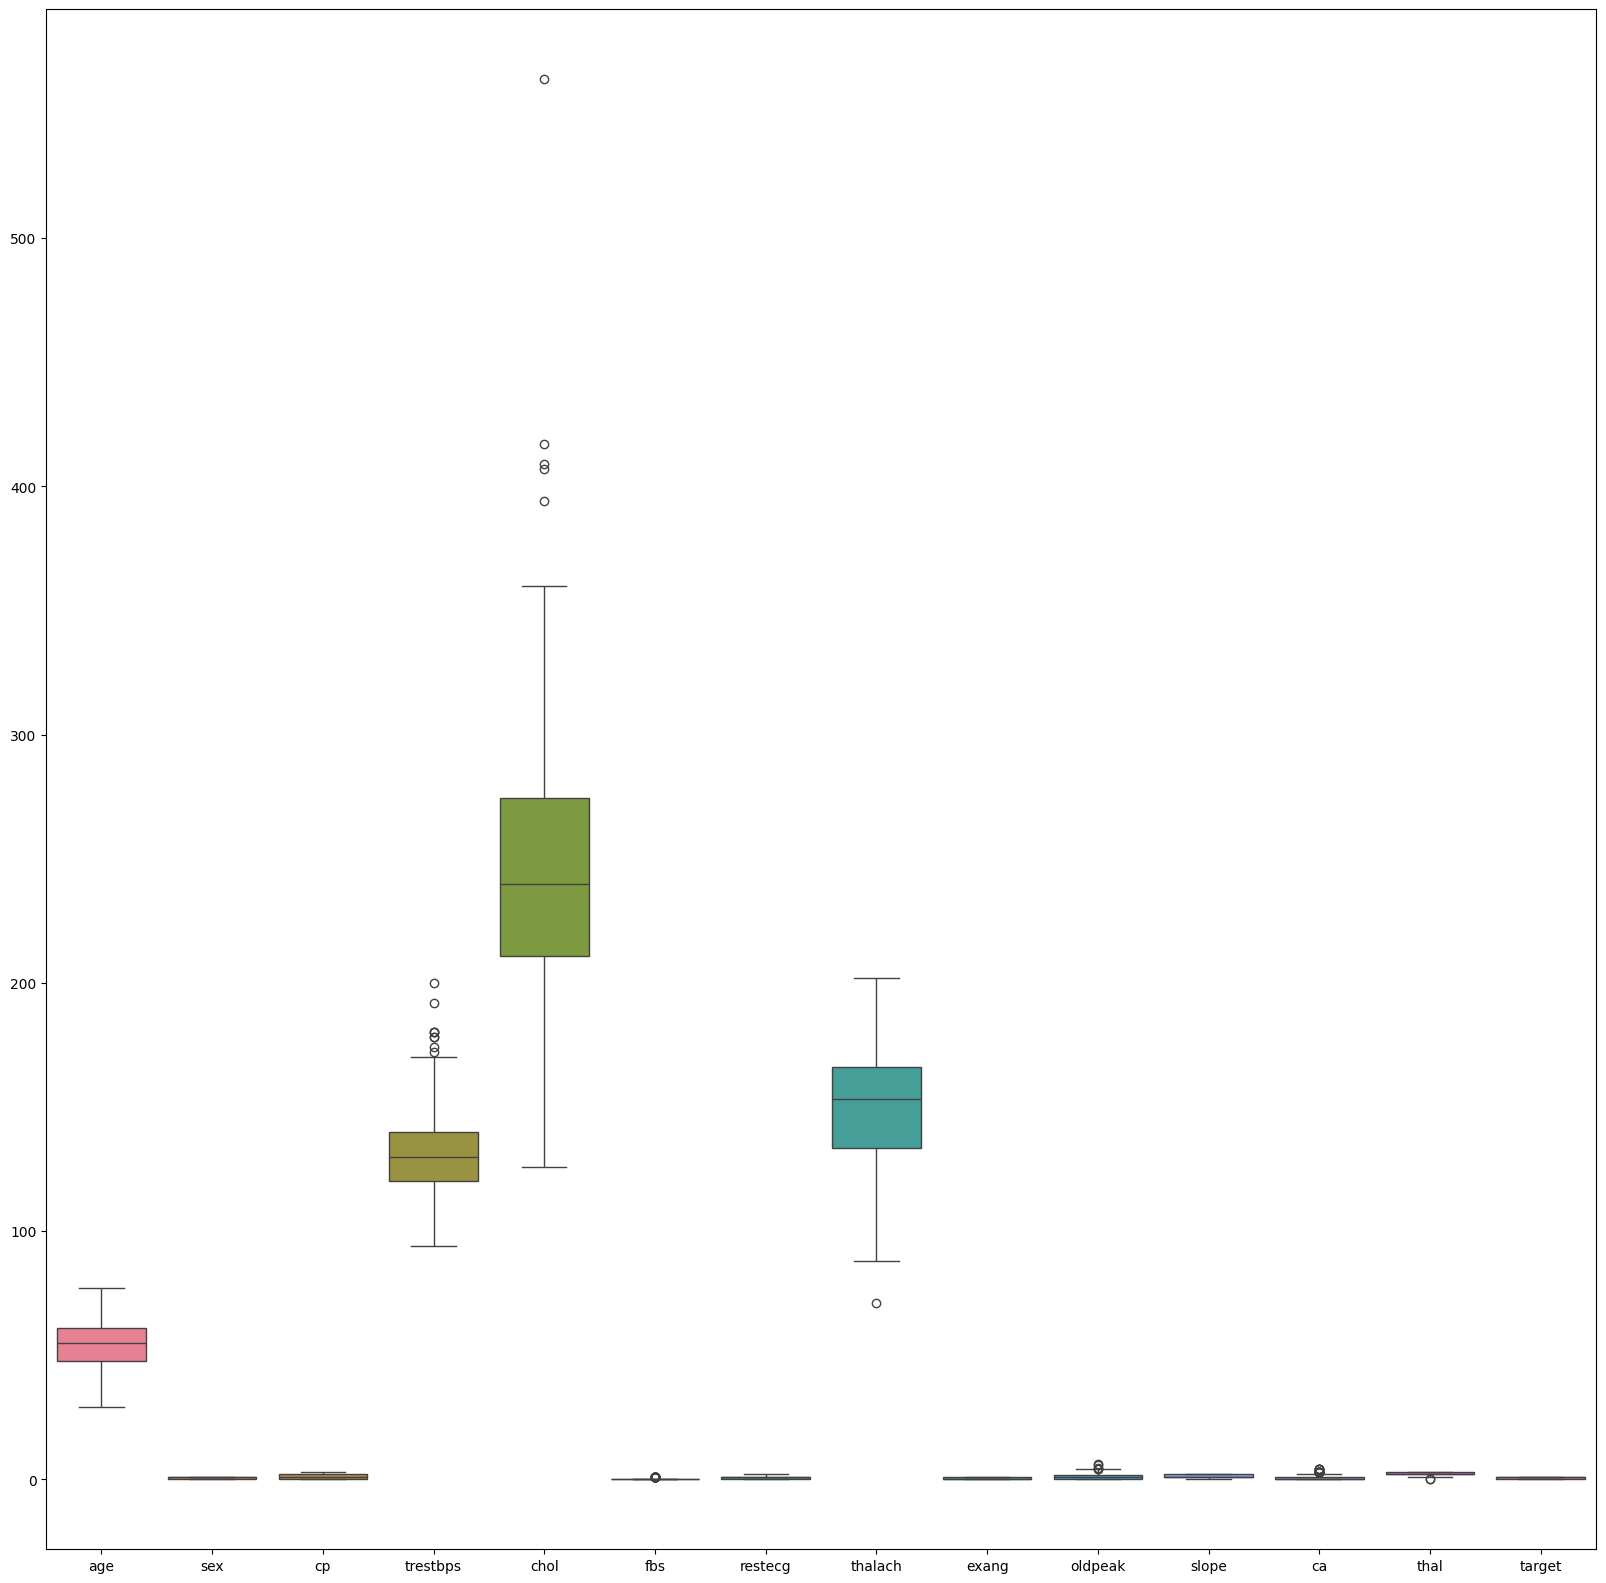

In [11]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

In [12]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956  0.256334  2.394438  1.005832   
1    1.915313  0.681005  1.002577  0.092738  0.072199  0.417635  0.898962   
2    1.474158  1.468418  0.032031  0.092738  0.816773  0.417635  1.005832   
3    0.180175  0.681005  0.032031  0.663867  0.198357  0.417635  0.898962   
4    0.290464  1.468418  0.938515  0.663867  2.082050  0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464  1.468418  0.938515  0.478391  0.101730  0.417635  0.898962   
299  1.033002  0.681005  1.973123  1.234996  0.342756  0.417635  0.898962   
300  1.503641  0.681005  0.938515  0.706843  1.029353  2.394438  0.898962   
301  0.290464  0.681005  0.938515  0.092738  2.227533  0.417635  0.898962   
302  0.290464  1.468418  0.032031  0.092738  0.198357  0.417635  1.005832   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [13]:
threshold = 3
print(np.where(z > 3))# The first array contains the list of row numbers and second array respective column numbers

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [15]:
df = df[(z < 3).all(axis=1)]
df.shape

(287, 14)

In [16]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(228, 14)

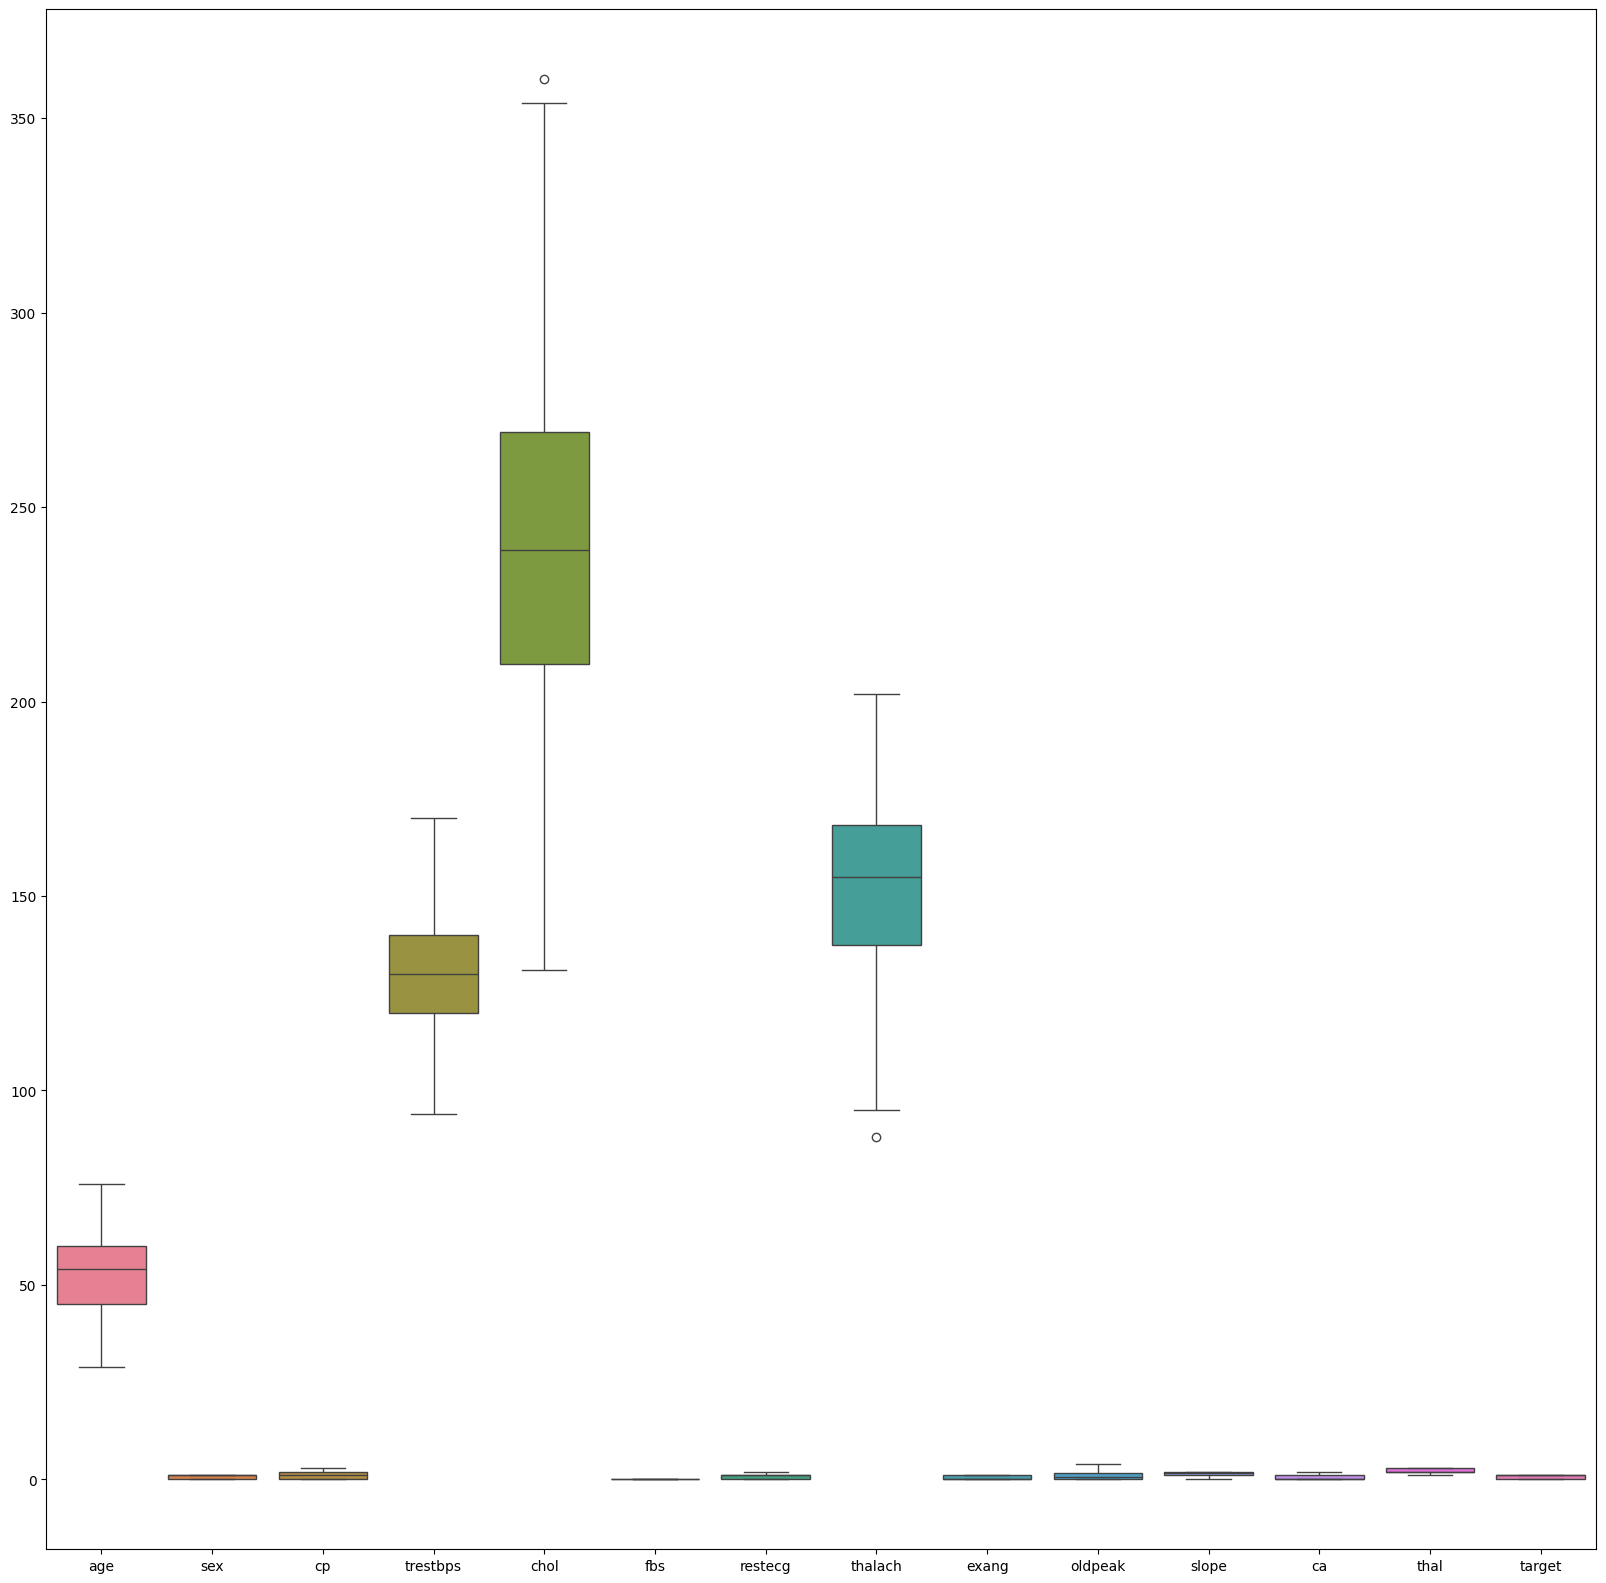

In [17]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

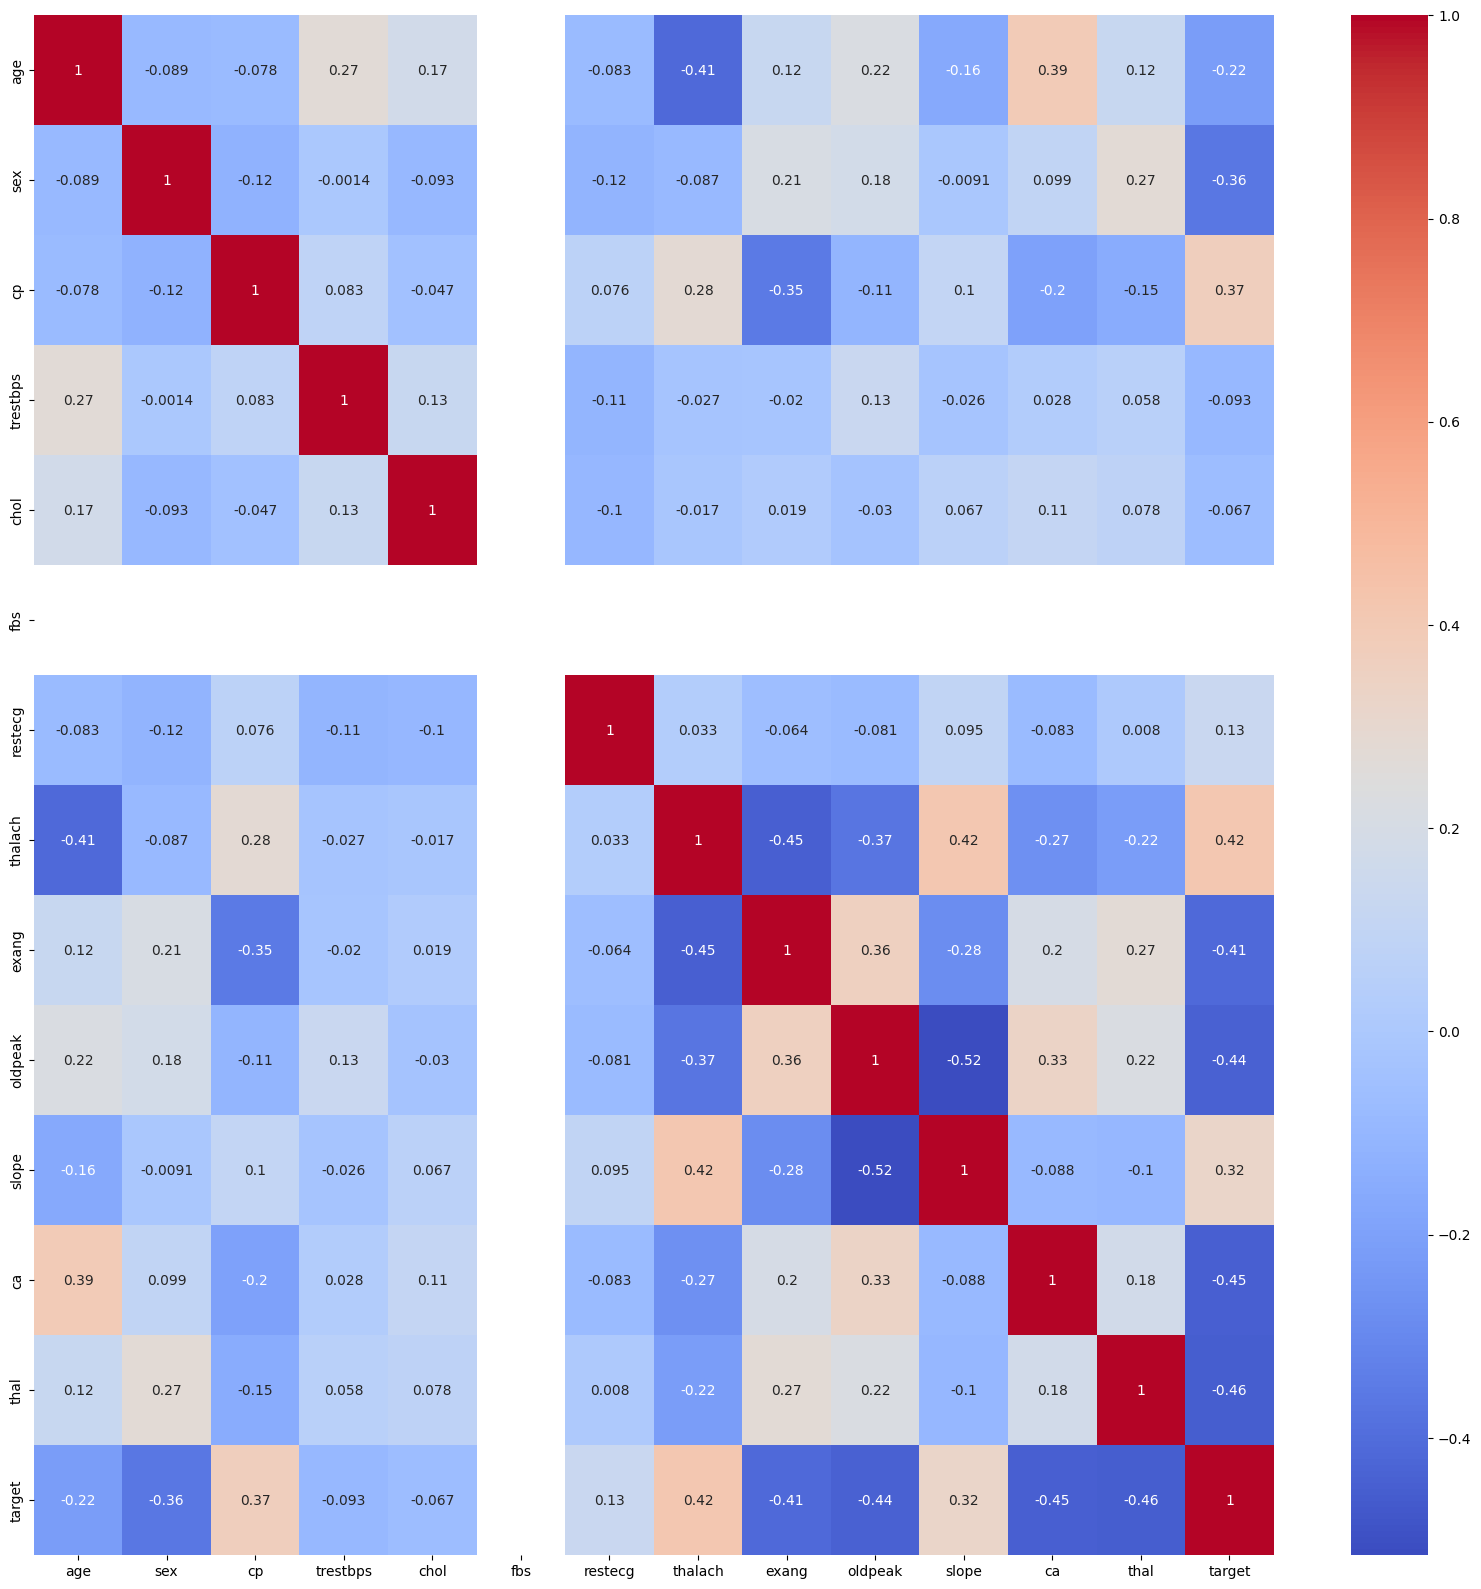

In [18]:
plt.figure(figsize=(20,20))
d = sns.heatmap(df.corr(),cmap="coolwarm",annot= True)

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


In [20]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])# creating dummy variable
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # we have taken these columns for scale down
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [21]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
1,-1.773674,0.086772,0.172434,1.600895,2.472003,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,-1.339305,0.086772,-0.867525,0.932553,0.439382,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
3,0.289579,-0.566164,-0.144075,1.199890,-0.141366,1,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
4,0.398172,-0.566164,2.523646,0.531547,-0.334949,1,1,0,1,0,...,1,0,0,1,1,0,0,0,1,0
5,0.398172,0.739707,-1.138819,-0.136795,-0.528532,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0


In [22]:
dataset.tail()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
296,1.049726,-0.304990,-1.025780,-0.671469,-0.915698,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
298,0.398172,0.739707,-0.031036,-1.250699,-0.722115,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
299,-0.904936,-1.219100,0.488943,-0.849694,0.245799,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
301,0.398172,0.086772,-2.517895,-1.607149,0.245799,0,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
302,0.398172,0.086772,-0.144075,1.021665,-0.915698,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [23]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.0000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,-2.337312e-16,-7.401487e-16,-1.012835e-16,-6.232831e-17,6.232831e-17,0.578947,0.324561,0.675439,0.473684,0.184211,...,0.315789,0.048246,0.451754,0.5000,0.640351,0.241228,0.118421,0.048246,0.587719,0.364035
std,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,0.494814,0.469241,0.469241,0.500406,0.388509,...,0.465852,0.214756,0.498762,0.5011,0.480953,0.428770,0.323817,0.214756,0.493328,0.482217
min,-2.642413e+00,-2.263797e+00,-2.517895e+00,-2.810165e+00,-9.156982e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.049359e-01,-5.661639e-01,-7.375302e-01,-6.046350e-01,-9.156982e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.239487e-02,8.677171e-02,-7.625177e-02,1.750979e-01,-3.349494e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.5000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.239487e-01,7.397074e-01,6.076344e-01,7.654671e-01,6.329653e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.0000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.461426e+00,2.698514e+00,2.659293e+00,2.269238e+00,2.955960e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


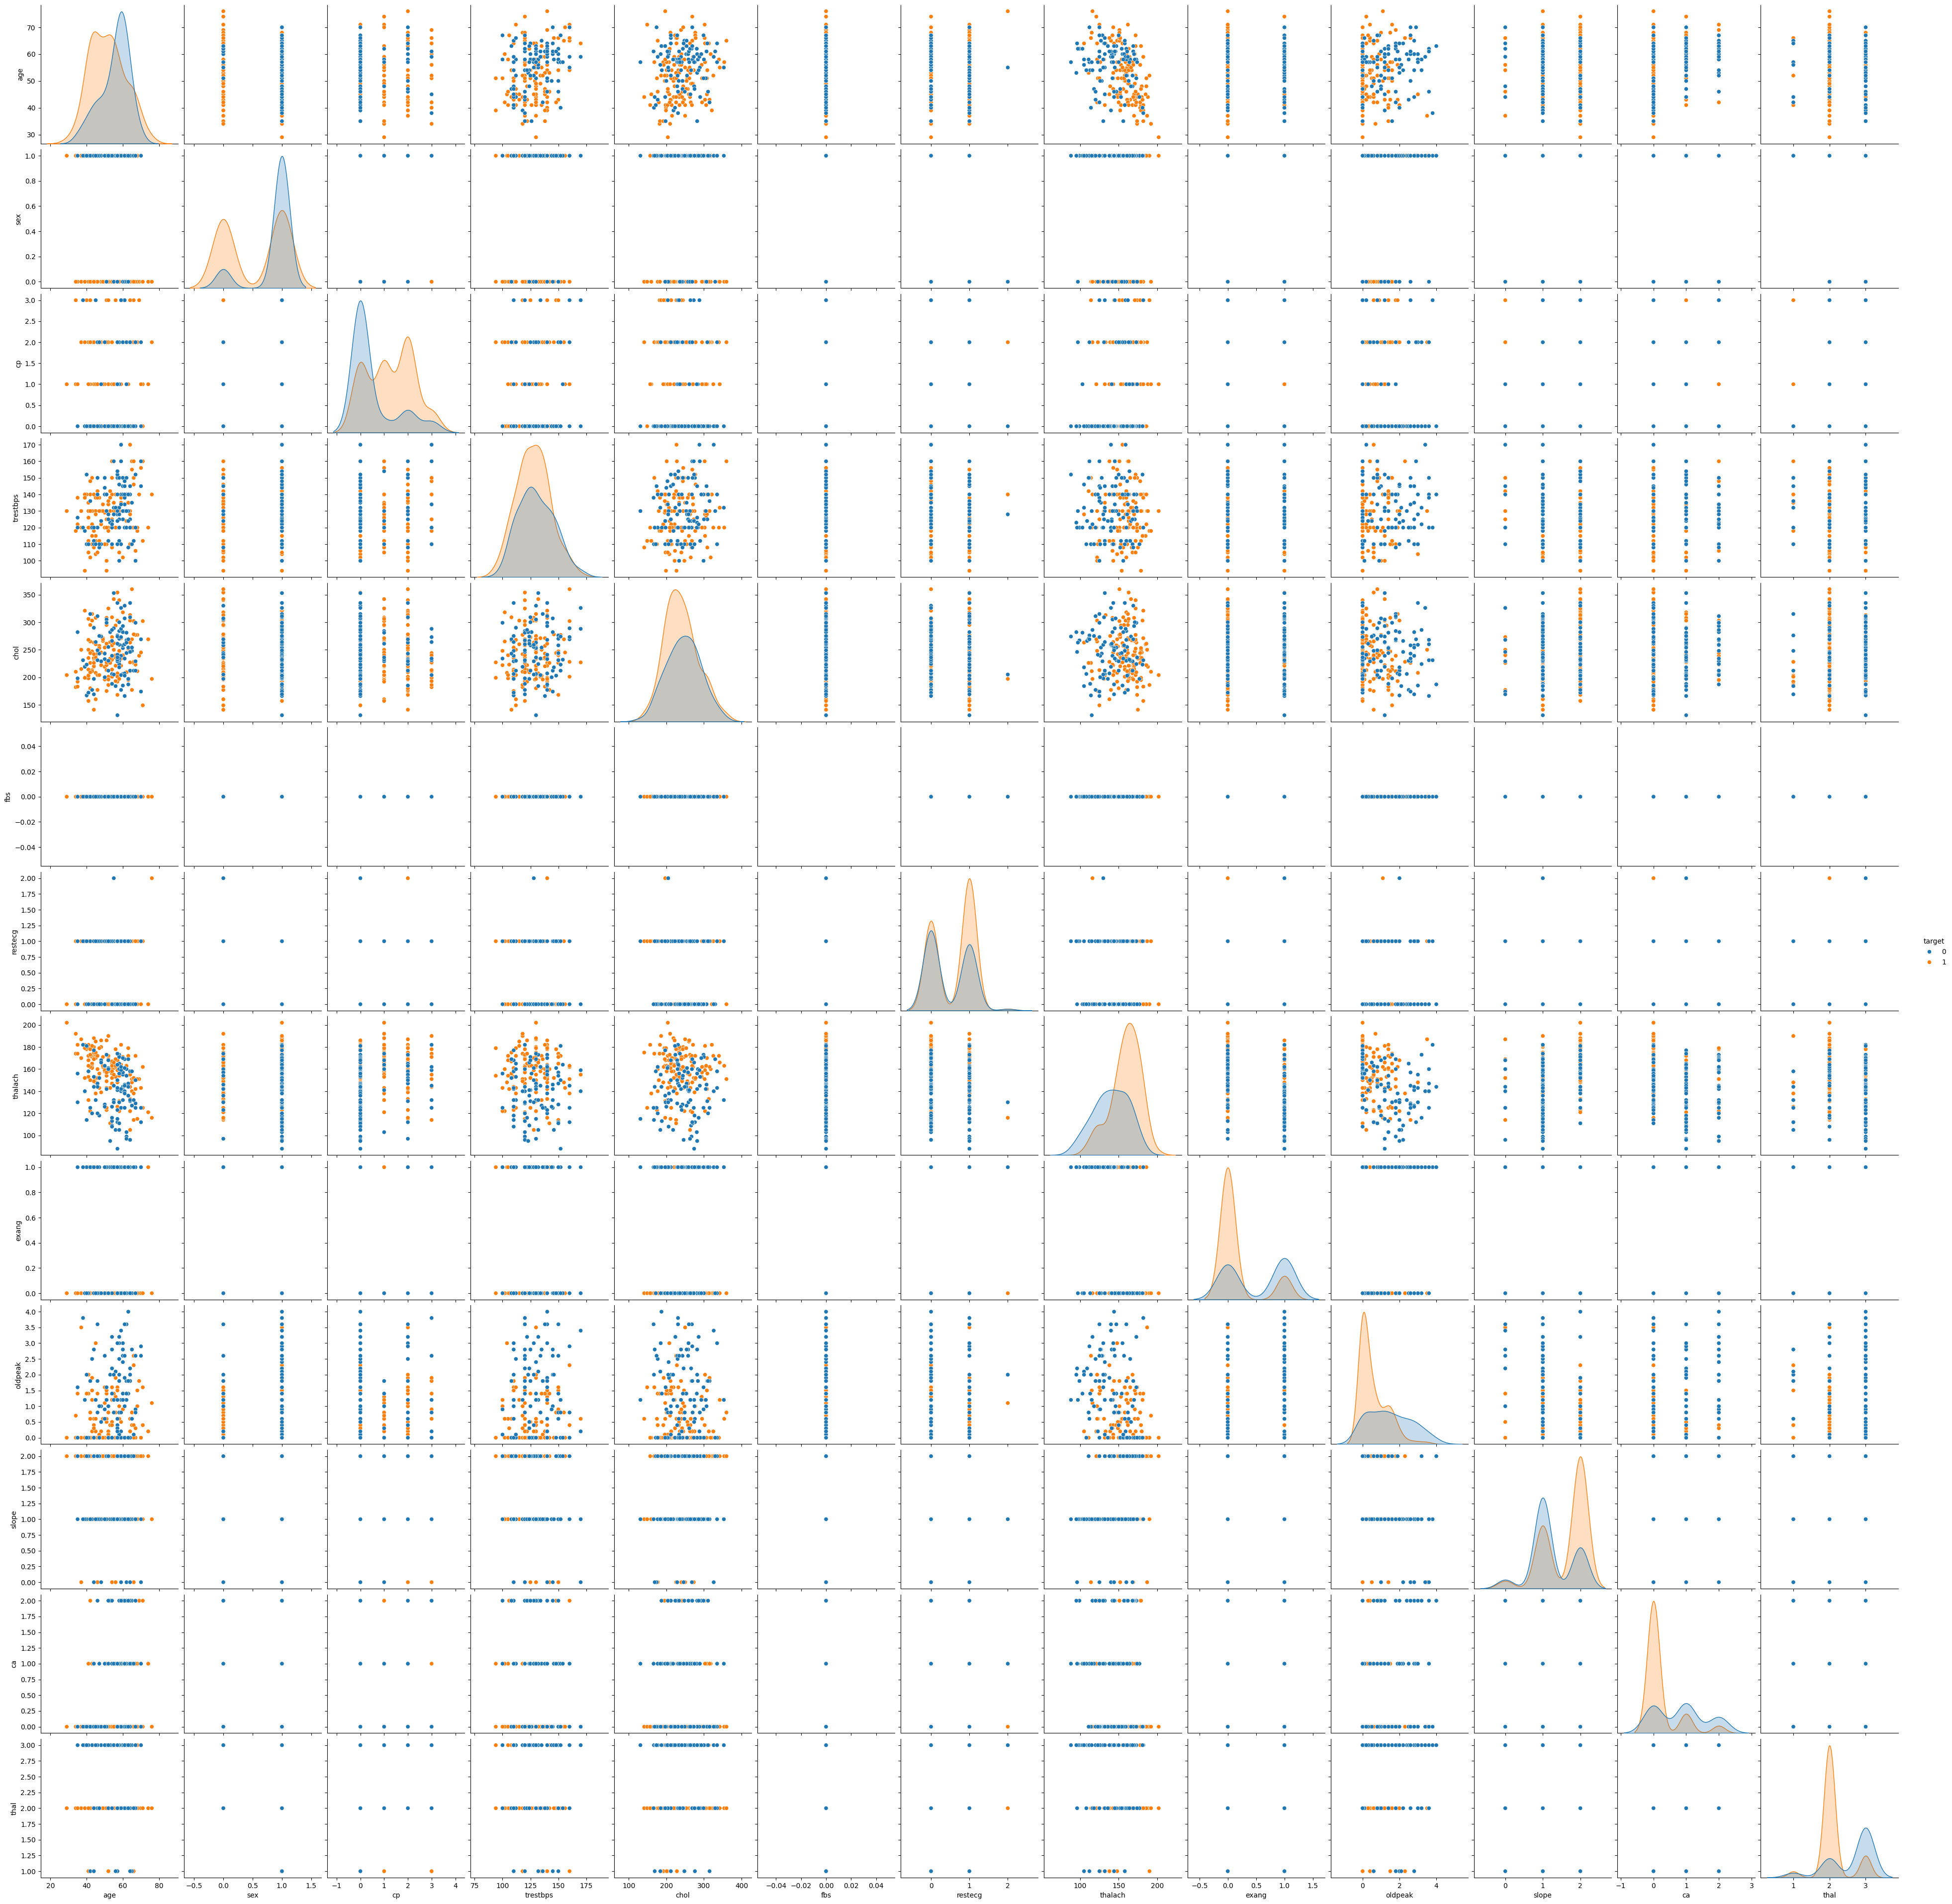

In [24]:
sns.pairplot(df , hue="target", height=3, aspect=1);

In [25]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.9130434782608695

In [30]:
score.mean()

0.8014619883040934

In [31]:
knn_classifier  = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=5, p=1,
 weights='uniform')
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.9782608695652174

In [32]:
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
score.mean()

0.8289473684210528

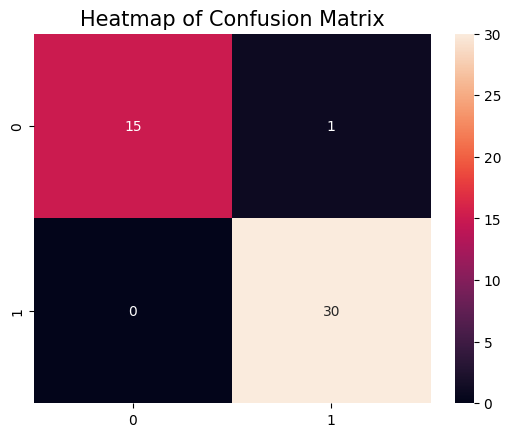

In [33]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [34]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.97      1.00      0.98        30

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.98        46
weighted avg       0.98      0.98      0.98        46



In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8695652173913043

In [36]:
score=cross_val_score(rf_classifier,X_train,y_train,cv=10)
score.mean()

0.7906432748538011

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100)
ada_clf.fit(X_train, y_train)

C:\Users\chinky\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=100)

In [38]:
y_pred_adb = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred_adb)

0.8478260869565217

In [39]:
score=cross_val_score(ada_clf,X_train,y_train,cv=10)
score.mean()

C:\Users\chinky\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\chinky\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\chinky\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\chinky\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default)

0.7798245614035089

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [41]:
y_pred_adb = gbc_clf.predict(X_test)
accuracy_score(y_test, y_pred_adb)

0.8913043478260869

In [42]:
score=cross_val_score(gbc_clf,X_train,y_train,cv=10)
score.mean()

0.7909356725146199

In [44]:
!pip install xgboost

   ---------------------------------------- 99.8/99.8 MB 1.1 MB/s eta 0:00:00


In [45]:
## Pickle
from xgboost import XGBClassifier
import pickle

# save model
pickle.dump(knn_classifier, open('model.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open('model.pkl', 'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))

Confusion matrix of K – Nearest Neighbor model: 
 [[15  1]
 [ 0 30]] 

Accuracy of K – Nearest Neighbor  model =  0.9782608695652174
